# **Weather Forecasting and Shift in Seasons using EDA**

---
This notebook is divided into 2 major sections: EDA and Prediction


Importing essential Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
import seaborn as sns


Reading the train and test data

In [ ]:
#Training Data
data=pd.read_csv('/content/drive/MyDrive/DATA.csv')
data.shape

#Viewing the training data
data.head()

,Month,Date,Year,Temperature
0,1,1,1995,50.7
1,1,2,1995,52.1
2,1,3,1995,53.8
3,1,4,1995,53.7
4,1,5,1995,54.5


The training dataset consists of Temperature in Delhi in Farenheit from 1st January 1995 to 12th May 2020. The 4 columns are Date, Month, Year and Temperature. The dependent variable is Temperature. 

In [ ]:
#Test Data
test=pd.read_csv('/content/drive/MyDrive/Book1.csv')
test.shape

#Viewing the test data
test.head()

,Month,Date,Year
0,1,1,2020
1,1,2,2020
2,1,3,2020
3,1,4,2020
4,1,5,2020


The test datset has dates from 1st January 2020 to 31st December 2020. The three columns are Date, Month and Year. 

For a better understanding, the temperature is converted to Celsius using the following function:

In [ ]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

#Converting the temperature 
data["temperature_C"] = fahr_to_celsius(data["Temperature"])

#rounding off the temperatures to 1 decimal point
data["temperature_C"]=round(data["temperature_C"],1)

data.head()

,Month,Date,Year,Temperature,temperature_C
0,1,1,1995,50.7,10.4
1,1,2,1995,52.1,11.2
2,1,3,1995,53.8,12.1
3,1,4,1995,53.7,12.1
4,1,5,1995,54.5,12.5


On scanning the data, we find some ambiguous values such as -99 F or 72.8 degree Celsius. As we know, it is not possible to have such a temperature, we consider this as missing data and handle it similarly.

In [ ]:
#Replacing the 72.8 value with NaN
data=data.replace(to_replace=-72.8,value=np.nan)

#Using Forward Fill Method to handle missing data
data=data.fillna(method='ffill') 

We wish to have index in DD-MM-YYYY format so that the dataset can be comprehended easily. For this we create a 'Day' parameter and set it as index.

In [ ]:
data['day'] = data[data.columns[0:3]].apply(
    lambda x: '-'.join(x.dropna().astype(str)),
    axis=1)

data=data.set_index(data['day'])
data=data.drop(columns=['day'])

data.head()

,Month,Date,Year,Temperature,temperature_C
day,,,,,
1-1-1995,1,1,1995,50.7,10.4
1-2-1995,1,2,1995,52.1,11.2
1-3-1995,1,3,1995,53.8,12.1
1-4-1995,1,4,1995,53.7,12.1
1-5-1995,1,5,1995,54.5,12.5


As our training and test data set have some overlapping values, we slice the training datset such that it has the data from 1995-2019 (25 years).

In [ ]:
data=data.iloc[:-133,:]

In [ ]:
#Choosing the dependent (y) and independent variables (x)
x=data.iloc[:,[0,1,2]]
y=data.iloc[:,4]

In [ ]:
x.head()

In [ ]:
y.head()

Now we split the training data set further into train and test for prediction purposes

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=0)
train_x.shape
test_x.shape

(1827, 3)

On trying different combinations of Regression models and hyperparamters, we recieve the following results on using Random Forest Regressor

In [ ]:
#n_estimators can be 10,100,1000
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(train_x, train_y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#Predicting the results for test_x
pred = regressor.predict(test_x)


In [ ]:
# Using r2_score and mean squared error for evaluation
r2_score(test_y, pred)


0.9615380496069263

In [ ]:
mean_squared_error(test_y,pred)

2.076526638204708

## Predictions for 2020

In [ ]:
y_pred = regressor.predict(test)
y_pred=pd.DataFrame(y_pred)


In [ ]:
#Joining the predicted results with the test dataset 
test=pd.concat([test,y_pred],axis=1)

#Changing the index to date
test['day'] = test[test.columns[0:3]].apply(
    lambda x: '-'.join(x.dropna().astype(str)),
    axis=1
)

test=test.set_index(test['day'])
test=test.drop(columns=['day'])

In [ ]:
test.head()

,Month,Date,Year,0
day,,,,
1-1-2020,1,1,2020,13.044
1-2-2020,1,2,2020,13.376
1-3-2020,1,3,2020,13.378
1-4-2020,1,4,2020,13.325
1-5-2020,1,5,2020,13.186


Column 0 shows the predicted temperature values

To analyse the accuracy of predictions we compare the Predicted v/s actual temperature values for 1-1-20 to 12-05-20

In [ ]:
#Formatting the actual and predicted values
actual=pd.read_csv('/content/drive/MyDrive/DATA.csv').iloc[-133:,:]
predicted=test.iloc[0:133,3]
predicted=predicted.to_frame()

actual['day'] = actual[actual.columns[0:3]].apply(
    lambda x: '-'.join(x.dropna().astype(str)),
    axis=1
)

actual=actual.set_index(actual['day'])
actual=actual.drop(columns=['day'])
actual["temperature_C"] = fahr_to_celsius(actual["Temperature"])
actual["temperature_C"]=round(actual["temperature_C"],1)

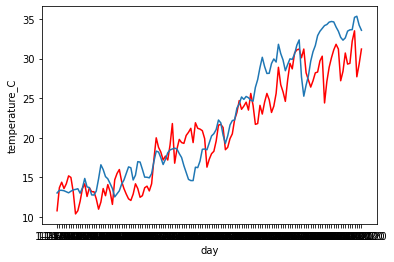

In [ ]:
#Plotting using line plot
a=sns.lineplot(x=actual.index,y=actual['temperature_C'],color='red') 
b=sns.lineplot(x=predicted.index,y=predicted[0]) 

In the above graph, the red line shows the actual values and blue depicts the predicted ones

Plotting the yearly average temperature and comparing it with predicted value of 2020 and mean of last 25 years

In [ ]:
#Groupby data by year
year=data.groupby('Year').mean().iloc[:,-1]
year=year.to_frame()
year.head()

,temperature_C
Year,
1995,24.967671
1996,24.306557
1997,23.586849
1998,24.569589
1999,24.978630


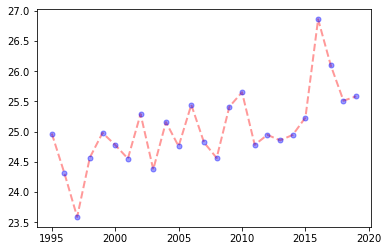

In [ ]:
plt.plot(year.index,year['temperature_C'],alpha=0.4,
         color='red',linestyle='dashed',linewidth=2,
         marker='o',markersize=5,markerfacecolor='blue',
         markeredgecolor='blue')

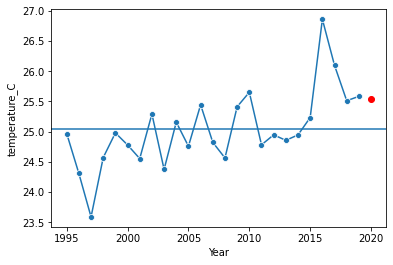

In [ ]:
#Comparison
graph=sns.lineplot(x=year.index,y=year['temperature_C'],marker='o') 
plt.scatter(2020,y_pred[0].mean(),color='red') #2020 predicted
graph.axhline(year['temperature_C'].mean())

The lines shows the average temperature of 1995-2020 and red point marks the predicted value of average temperature of 2020

Plotting the trendline 

In [ ]:
z = np.polyfit(y=year['temperature_C'],x=year.index,deg=2)

p = np.poly1d(z)
plt.scatter(x=year['temperature_C'],y=year.index)
plt.plot(x,p(x),"r--")

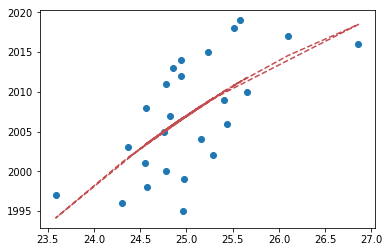

Using a box plot to show the variation in monthly temperature 

In [ ]:
#Grouping data for every year month wise
month=data.groupby(['Year','Month']).mean().iloc[:,-1]
month=month.to_frame()

month.reset_index(level=1, inplace=True)

month.head()

,Month,temperature_C
Year,,
1995,1,13.087097
1995,2,16.867857
1995,3,21.448387
1995,4,28.393333
1995,5,33.993548


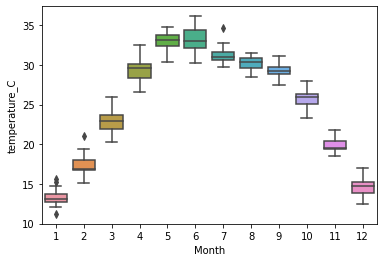

In [ ]:
sns.boxplot(x=month['Month'], y=month['temperature_C'])

Plotting frequency of temperature using Histogram

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


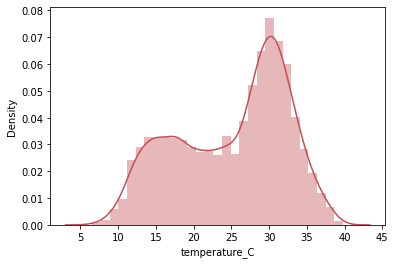

In [ ]:
sns.set_color_codes()
ax = sns.distplot(data['temperature_C'],color='r')

Plotting the trend of 4 seasons in Delhi

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


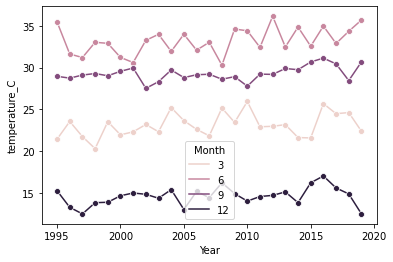

In [ ]:
month=month.loc[month['Month'].isin(['3','6','9','12'])]
sns.lineplot(month.index, 'temperature_C', ci=None, 
             hue='Month', data=month, marker='o')